In [26]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
loan_df = pd.read_csv("loan.csv")
loan_df.head()

/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
loan_df.dtypes.value_counts()

float64    74
object     24
int64      13
dtype: int64

In [36]:
loan_df.shape

(39717, 111)

## Univariate

In [11]:
# check if annual_inc has na values
loan_df["annual_inc"].isna().sum()

0

In [12]:
# check the datatype
loan_df["annual_inc"].dtype

dtype('float64')

In [23]:
data = loan_df["annual_inc"]

In [30]:
data.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


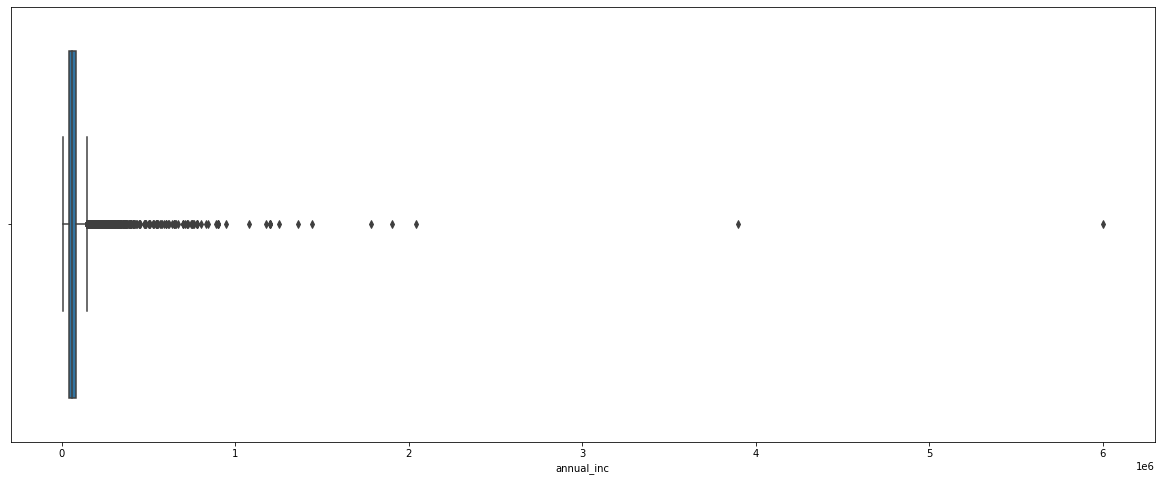

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.boxplot(data)
plt.show()

In [33]:
data = loan_df["mths_since_last_delinq"]

In [37]:
data.shape

(39717,)

In [38]:
data.isna().sum()

25682

In [35]:
data.describe()

count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [39]:
data = loan_df["total_rec_late_fee"]

In [40]:
data.isna().sum()

0

In [41]:
data.describe()

count    39717.000000
mean         1.363015
std          7.289979
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64

In [44]:
loan_df[(loan_df["total_rec_late_fee"] > 0) & (loan_df["mths_since_last_delinq"] > 0)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
3,1076863,1277178,10000,10000,10000.000000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
18,1062474,1294539,6000,6000,6000.000000,36 months,11.71%,198.46,B,B3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
79,1048390,1279714,18000,18000,18000.000000,60 months,19.91%,475.99,E,E4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
114,1068012,1302365,10000,10000,10000.000000,36 months,18.25%,362.78,D,D5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
120,1068202,1302588,25000,25000,23088.161060,60 months,13.49%,575.12,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39537,166747,166429,5000,5000,349.992045,36 months,11.86%,165.74,D,D1,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39578,148473,148467,10000,10000,1825.004738,36 months,9.01%,318.05,B,B2,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39582,146564,138910,8275,8275,2300.003381,36 months,10.59%,269.31,C,C2,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39601,139980,139977,12000,5000,1399.996684,36 months,10.91%,163.49,C,C3,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


## Principal Outstanding

In [50]:
loan_df["principal_outstanding"] = np.round(np.abs(loan_df["loan_amnt"] - loan_df["total_rec_prncp"]))

In [51]:
loan_df["principal_outstanding"].value_counts()

0.0        31505
5000.0        12
2500.0        11
8000.0        11
1500.0        11
           ...  
10136.0        1
4065.0         1
877.0          1
2033.0         1
3923.0         1
Name: principal_outstanding, Length: 5750, dtype: int64

In [53]:
ratio = loan_df["principal_outstanding"] / loan_df["total_rec_late_fee"]
ratio.value_counts()

inf           7253
0.000000      1087
469.822485       1
116.298587       1
256.698843       1
              ... 
445.000001       1
7.109408         1
187.028943       1
142.346221       1
565.441176       1
Length: 961, dtype: int64

In [56]:
loan_df[loan_df["principal_outstanding"] == 0]["recoveries"].value_counts()

0.0    31505
Name: recoveries, dtype: int64

In [57]:
loan_df["recoveries"].value_counts()

0.00       35499
11.29          4
10.40          4
10.66          3
44.92          3
           ...  
764.69         1
653.08         1
1080.96        1
878.19         1
21.29          1
Name: recoveries, Length: 4040, dtype: int64

/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


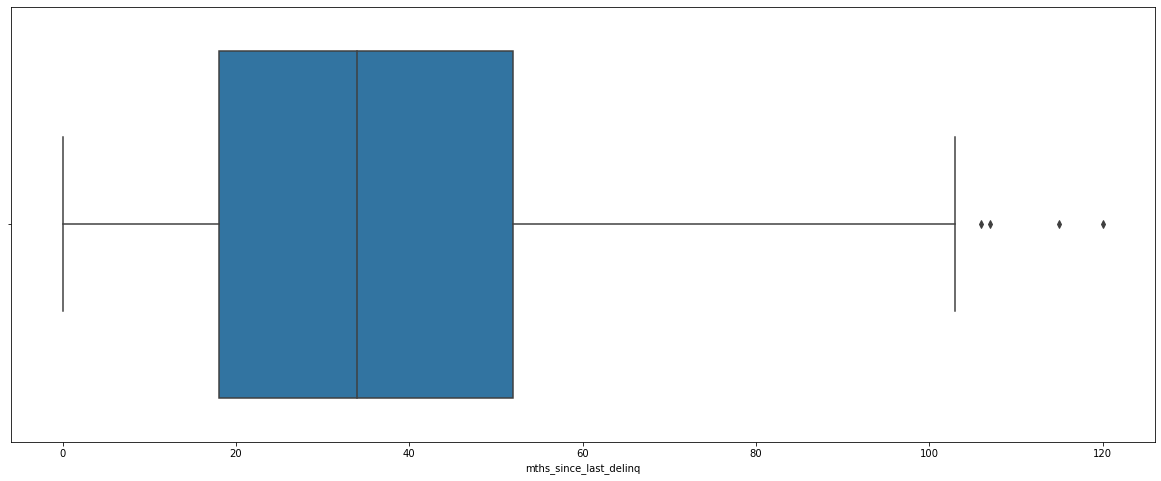

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.boxplot(data)
plt.show()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.boxplot(data)
plt.show()

/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


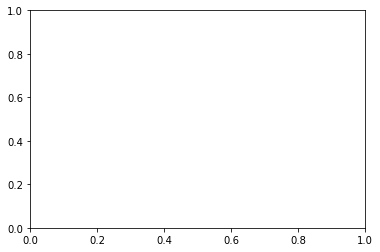

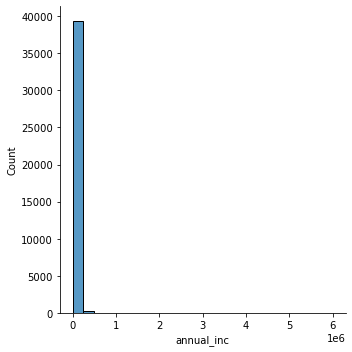

In [32]:
ax = plt.subplots()
sns.displot(data, bins=25, ax=ax)

### Data Cleaning

In [235]:
loan_df = pd.read_csv("loan.csv")
loan_df.head()

/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [236]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [237]:
loan_df.shape

(39717, 111)

In [85]:
round(loan_df.isnull().sum() / loan_df.shape[0] * 100)

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [238]:
## Drop columns with missing values > 40%

ms_values = round(loan_df.isnull().sum() / loan_df.shape[0] * 100)
drop_cols = ms_values[ms_values > 40].index

print(f"{len(drop_cols)} columns will be dropped")
loan_df.drop(drop_cols,axis=1, inplace=True)

57 columns will be dropped


In [239]:
## Drop id columns
id_cols = ["id", "member_id"]
loan_df.drop(id_cols,axis=1, inplace=True)

In [240]:
loan_df.shape

(39717, 52)

In [241]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### Understand the columns

In [242]:
loan_df.dtypes.value_counts()

object     23
float64    18
int64      11
dtype: int64

In [243]:
cat_cols = loan_df.dtypes[loan_df.dtypes == "object"].index
continuous_col = loan_df.dtypes[loan_df.dtypes != "object"].index

In [244]:
cat_cols

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

In [ ]:
## drop col 
# pymnt_plan,initial_list_status,application_type has only one value desc?

In [245]:
drop_cols = ["pymnt_plan","initial_list_status","application_type"]
loan_df.drop(drop_cols,axis=1, inplace=True)

In [ ]:
## columns that need to formatted
# term int_rate emp_length issue_d title zip_code earliest_cr_line revol_util last_pymnt_d last_credit_pull_d

### Drop rows with min 1 null value

In [246]:
loan_df = loan_df[loan_df.isna().sum(axis=1) == 0]
loan_df.shape

(24406, 49)

In [247]:
loan_df[loan_df.isna().sum(axis=1) > 0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [248]:
loan_df.term.value_counts()

 36 months    17844
 60 months     6562
Name: term, dtype: int64

In [250]:
loan_df['term'] = loan_df.term.apply(lambda x: int(x[1:3]))

In [251]:
loan_df["int_rate"] = loan_df['int_rate'].apply(lambda x: float(x[:-1]))

In [252]:
loan_df["emp_length"].value_counts()

10+ years    5382
2 years      2939
< 1 year     2797
3 years      2648
1 year       2202
4 years      2162
5 years      2060
6 years      1362
7 years      1129
8 years       918
9 years       807
Name: emp_length, dtype: int64

In [255]:
## Since we dont have the data to differentiate emp_length above 10 years, lets consider them together

##
loan_df["emp_length"] = loan_df["emp_length"].apply(lambda x: 10 if x == "10+ years" 
                                            else 1 if x == "< 1 year"
                                            else int(x[0]) ).value_counts()

In [ ]:
# title zip_code

In [261]:
loan_df["revol_util"]= loan_df["revol_util"].apply(lambda x: float(x[:-1]))

In [ ]:
## Extract features
# url???

In [262]:
continuous_col

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [ ]:
### drop cols
# chargeoff_within_12_mths delinq_amnt tax_liens collections_12_mths_ex_med policy_code acc_now_delinq

In [263]:
drop_cols = ["chargeoff_within_12_mths", "delinq_amnt" ,"tax_liens" ,
        "collections_12_mths_ex_med","policy_code" ,"acc_now_delinq"]
loan_df.drop(drop_cols,axis=1, inplace=True)

In [ ]:
## columns that need to formatted
# pub_rec_bankruptcies

In [264]:
loan_df["pub_rec_bankruptcies"].value_counts()

0.0    23403
1.0      999
2.0        4
Name: pub_rec_bankruptcies, dtype: int64

In [ ]:
## date columns
# last_pymnt_d, last_credit_pull_d, issue_d earliest_cr_line

In [265]:
loan_df.shape

(24406, 43)

In [266]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [82]:
"home_ownership" in loan_df.columns

True

In [78]:
"total_rec_late_fee" in loan_df.columns

True

In [79]:
"mths_since_last_delinq" in loan_df.columns

False

In [81]:
loan_df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [268]:
loan_df["earliest_cr_line"]

1        Apr-99
3        Feb-96
4        Jan-96
6        Jul-05
7        Jan-07
          ...  
39433    Feb-95
39475    Oct-79
39551    Dec-00
39562    Mar-00
39623    Aug-97
Name: earliest_cr_line, Length: 24406, dtype: object

In [4]:
def fact_n(n):
    if(n==1):
        return 1
    else:
        return n * fact_n(n-1)

In [6]:
print(fact_n(5))

120


In [3]:
type(fact_n)

function

In [16]:
import ast,sys
input_str = "[3,9,1,0,18,11]"
input_list = ast.literal_eval(input_str)

In [17]:
input_list

[3, 9, 1, 0, 18, 11]

In [18]:
[ num*num if divmod(num,3)[1] == 0 else num for num in input_list]

[9, 81, 1, 0, 324, 11]

In [19]:
n = "9"
l = [1,2,3,4]
n * l

TypeError: can't multiply sequence by non-int of type 'list'

In [20]:
"9" * 2

'99'

In [24]:
import functools


In [30]:
n = "10"
l = [ int(n * i) for i in [1,2,3,4]]
print(l)

functools.reduce(lambda x,y: x+y, l )

[10, 1010, 101010, 10101010]


10203040

In [31]:
s = "ddddaacccb"
n = 3

In [48]:
import numpy as np
import pandas as pd

In [42]:
dict = {}

for c in s:
    if c in dict.keys():
        dict[c] = dict[c] + 1
    else:
        dict[c]= 0

dict

{'d': 3, 'a': 1, 'c': 2, 'b': 0}

In [58]:
df = pd.DataFrame.from_dict(dict, orient="index")
df.columns = ["Count"]
df

,Count
d,3
a,1
c,2
b,0


In [60]:
df.sort_values(by="Count", ascending=False)

,Count
d,3
c,2
a,1
b,0


In [62]:
df.index[:3]

Index(['d', 'a', 'c'], dtype='object')

In [63]:
i = 3
j = 4

In [68]:
arr = np.zeros([i,j])
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [80]:
x=3
y=3

arr = np.array([ (i+j) / 2 for i in range(0,x) for j in range(0,y)] )
arr.reshape(x,y)

array([[0. , 0.5, 1. ],
       [0.5, 1. , 1.5],
       [1. , 1.5, 2. ]])

In [73]:
l = []
for i in range(0,3):
    a = []
    for j in range(0,4):
        n = (i+j)/2
        a.append(n)
    l.append(a)
l

[[0.0, 0.5, 1.0, 1.5], [0.5, 1.0, 1.5, 2.0], [1.0, 1.5, 2.0, 2.5]]

In [71]:
n1 = np.arange(0,i)
n2 = np.arange(0, j)

[  ]

[array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.])]

In [81]:
from collections import Counter

In [108]:
s = "ddddaacccb"
s = sorted(s)
print(s)
c = Counter(s)
print(c)
top = c.most_common(3)
print(top)
s_top = sorted(top)
print(s_top)
[ t[0] for t in s_top]

['a', 'a', 'b', 'c', 'c', 'c', 'd', 'd', 'd', 'd']
Counter({'d': 4, 'c': 3, 'a': 2, 'b': 1})
[('d', 4), ('c', 3), ('a', 2)]
[('a', 2), ('c', 3), ('d', 4)]


['a', 'c', 'd']

In [110]:
s = "aabbccc"
s = sorted(s)
print(s)
c = Counter(s)
print(c)
top = c.most_common(2)
print(top)
s_top = sorted(top)
print(s_top)
[ t[0] for t in s_top]

['a', 'a', 'b', 'b', 'c', 'c', 'c']
Counter({'c': 3, 'a': 2, 'b': 2})
[('c', 3), ('a', 2)]
[('a', 2), ('c', 3)]


['a', 'c']

In [111]:
s = "ddxxaaa"
s = sorted(s)
print(s)
c = Counter(s)
print(c)
top = c.most_common(2)
print(top)
s_top = sorted(top)
print(s_top)
[ t[0] for t in s_top]

['a', 'a', 'a', 'd', 'd', 'x', 'x']
Counter({'a': 3, 'd': 2, 'x': 2})
[('a', 3), ('d', 2)]
[('a', 3), ('d', 2)]


['a', 'd']